# Cell segmentation from celltrackingchallenge.net

[Mouse muscle stem cells in hydrogel microwells](http://celltrackingchallenge.net/2d-datasets/)




## Download dataset

In [45]:
import requests
from tqdm.notebook import tqdm
import os

url = "http://data.celltrackingchallenge.net/training-datasets/BF-C2DL-MuSC.zip"
filename = 'data/train.zip'
temp_filename = 'data/train.temp'
if not os.path.exists(filename):
    if not os.path.exists("data"):
        os.mkdir("data")

    # Stream the download in chunks with requests.get and iterate with tqdm
    response = requests.get(url, stream=True)
    total_size_in_bytes = int(response.headers.get('content-length', 0))
    block_size = 1024 * 8 # 1 Kibibyte
    progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)

    # Write the downloaded chunks to a file with tqdm.write
    with open(temp_filename, 'wb') as f:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            f.write(data)
    progress_bar.close()

    # Verify that the file has been downloaded
    if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
        print("ERROR: Failed to download the entire file!")
    else:
        os.rename(temp_filename,filename)
        print("File has been downloaded successfully!")
else:
    print("Dataset downloaded")

Dataset downloaded


In [46]:
import zipfile

extract_dir = "data/train"
if not os.path.exists(extract_dir):
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("Extracted")

## Examine data

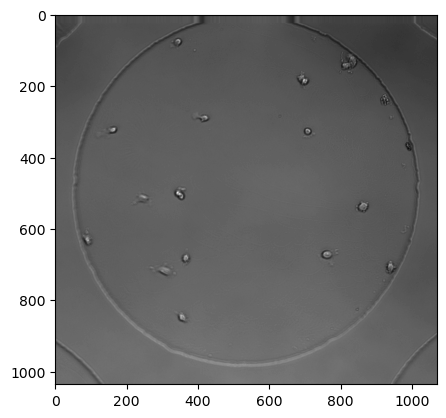

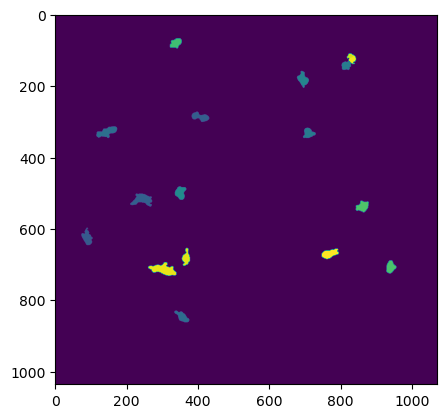

Anotation: (1036, 1070) 127


In [47]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
PATH = os.path.join("data","train","BF-C2DL-MuSC")

img = Image.open(PATH + "/01/t1300.tif")
plt.imshow(img, cmap="gray")
plt.show()

ant = Image.open(PATH + "/01_ST/seg/man_seg1300.tif")
plt.imshow(ant)
plt.show()

ant_np = np.asarray(ant)
print("Anotation:", ant_np.shape, np.max(ant_np))

## Create dataframe

In [48]:
import glob
set_num = []
# imaage paths
image_paths = []
globed = glob.glob(os.path.join(os.path.join(PATH,"01") , f'*.tif'))
set_num = [1 for i in globed]
image_paths +=globed
globed = glob.glob(os.path.join(os.path.join(PATH,"02") , f'*.tif'))
set_num += [2 for i in globed]
image_paths += globed
print(len(image_paths))
# segmentation anottations
image_seg_anot = []
image_seg_anot += glob.glob(os.path.join(os.path.join(PATH,"01_ST","SEG") , f'*.tif'))
image_seg_anot += glob.glob(os.path.join(os.path.join(PATH,"02_ST","SEG") , f'*.tif'))
print(len(image_paths))

2752
2752


In [49]:
import pandas as pd

dataset = pd.DataFrame(zip(image_paths,image_seg_anot, set_num),columns=["image_path", "seg_path", "set"])
dataset

,image_path,seg_path,set
0,data\train\BF-C2DL-MuSC\01\t0000.tif,data\train\BF-C2DL-MuSC\01_ST\SEG\man_seg0000.tif,1
1,data\train\BF-C2DL-MuSC\01\t0001.tif,data\train\BF-C2DL-MuSC\01_ST\SEG\man_seg0001.tif,1
2,data\train\BF-C2DL-MuSC\01\t0002.tif,data\train\BF-C2DL-MuSC\01_ST\SEG\man_seg0002.tif,1
3,data\train\BF-C2DL-MuSC\01\t0003.tif,data\train\BF-C2DL-MuSC\01_ST\SEG\man_seg0003.tif,1
4,data\train\BF-C2DL-MuSC\01\t0004.tif,data\train\BF-C2DL-MuSC\01_ST\SEG\man_seg0004.tif,1
...,...,...,...
2747,data\train\BF-C2DL-MuSC\02\t1371.tif,data\train\BF-C2DL-MuSC\02_ST\SEG\man_seg1371.tif,2
2748,data\train\BF-C2DL-MuSC\02\t1372.tif,data\train\BF-C2DL-MuSC\02_ST\SEG\man_seg1372.tif,2
2749,data\train\BF-C2DL-MuSC\02\t1373.tif,data\train\BF-C2DL-MuSC\02_ST\SEG\man_seg1373.tif,2
2750,data\train\BF-C2DL-MuSC\02\t1374.tif,data\train\BF-C2DL-MuSC\02_ST\SEG\man_seg1374.tif,2


In [50]:
print(dataset.tail(5)["image_path"])
print(dataset.tail(5)["seg_path"])

2747    data\train\BF-C2DL-MuSC\02\t1371.tif
2748    data\train\BF-C2DL-MuSC\02\t1372.tif
2749    data\train\BF-C2DL-MuSC\02\t1373.tif
2750    data\train\BF-C2DL-MuSC\02\t1374.tif
2751    data\train\BF-C2DL-MuSC\02\t1375.tif
Name: image_path, dtype: object
2747    data\train\BF-C2DL-MuSC\02_ST\SEG\man_seg1371.tif
2748    data\train\BF-C2DL-MuSC\02_ST\SEG\man_seg1372.tif
2749    data\train\BF-C2DL-MuSC\02_ST\SEG\man_seg1373.tif
2750    data\train\BF-C2DL-MuSC\02_ST\SEG\man_seg1374.tif
2751    data\train\BF-C2DL-MuSC\02_ST\SEG\man_seg1375.tif
Name: seg_path, dtype: object


In [51]:
dataset.to_json("data/dataset.json")

# Create sequence dataset

In [52]:

seq = []
for index, row in dataset.iterrows():
    row_set = row["set"]
    row_seq = []
    anot_seq = []
    for i in range(-4,1):
        if row_set != dataset["set"].iloc[index+i]:
            break
        row_seq.append(dataset["image_path"].iloc[index+i])
        anot_seq.append(dataset["seg_path"].iloc[index+i])
    if len(row_seq) <= 4:
        continue
    else:
        seq.append([row_seq, anot_seq,row["image_path"]])
        
seq
seq_dataset = pd.DataFrame(seq,columns=["seqence","anot","path",])
print(seq_dataset["seqence"][100])
print(seq_dataset["anot"][100])

['data\\train\\BF-C2DL-MuSC\\01\\t0100.tif', 'data\\train\\BF-C2DL-MuSC\\01\\t0101.tif', 'data\\train\\BF-C2DL-MuSC\\01\\t0102.tif', 'data\\train\\BF-C2DL-MuSC\\01\\t0103.tif', 'data\\train\\BF-C2DL-MuSC\\01\\t0104.tif']
['data\\train\\BF-C2DL-MuSC\\01_ST\\SEG\\man_seg0100.tif', 'data\\train\\BF-C2DL-MuSC\\01_ST\\SEG\\man_seg0101.tif', 'data\\train\\BF-C2DL-MuSC\\01_ST\\SEG\\man_seg0102.tif', 'data\\train\\BF-C2DL-MuSC\\01_ST\\SEG\\man_seg0103.tif', 'data\\train\\BF-C2DL-MuSC\\01_ST\\SEG\\man_seg0104.tif']


In [53]:
seq_dataset.to_json("data/dataset_seq.json")